### Random walk

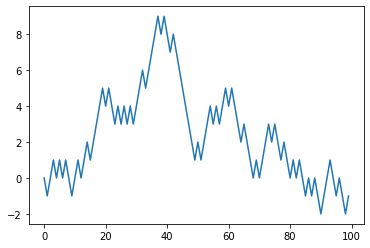

In [1]:
import random

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

import matplotlib.pyplot as plt
plt.plot(walk[0:100])

#### python random.randint 与numpy.random.randint的区别

In [2]:
import numpy as np
import random

ls = np.random.randint(0,3,10)
ls    # numpy.random.randint() 从0，1，2中选择随机数，不包括3

array([0, 2, 2, 1, 2, 2, 1, 1, 2, 0])

In [3]:
ls2 = random.randint(0, 3)
ls2   # python random.randint() 从low，high中选择随机数，包括两端

1

In [13]:
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
# draws
steps = np.where(draws > 0, 1, -1)
# print(steps)
walk = steps.cumsum()
#print(walk)
print("min:", walk.min())
print("max:", walk.max())
print(np.abs(walk) > 10)    # a boolean array indicating where the walk has reached or exceeded 10
(np.abs(walk) > 10).argmax()    # the FIRST INDEX of the maximum value in boolean array

min: -8
max: 47
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False Fals

182

### Many Random walks at once

In [19]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size = (nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
print(steps)
walks = steps.cumsum(1)    #按列取和，即第一列保持不变
print(walks)

[[ 1 -1  1 ... -1  1  1]
 [-1 -1  1 ...  1 -1 -1]
 [-1  1 -1 ...  1 -1  1]
 ...
 [ 1  1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1  1 -1]
 [-1  1 -1 ... -1 -1  1]]
[[  1   0   1 ...  24  25  26]
 [ -1  -2  -1 ... -40 -41 -42]
 [ -1   0  -1 ...   8   7   8]
 ...
 [  1   2   1 ... -14 -15 -16]
 [  1   0  -1 ...   6   7   6]
 [ -1   0  -1 ...  -4  -5  -4]]


In [16]:
walks.max()

112

In [17]:
walks.min()

-124

#### Compute the minimum crossing time to 30 or -30

In [27]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True,  True, ...,  True, False, False])

In [29]:
hits30.sum()    # Number that hits 30 or -30

3423

In [30]:
# We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level
# and call argmax() across axis 1 to get the crossing times:

crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times

array([667, 435, 675, ..., 385, 955, 489], dtype=int64)

In [32]:
steps = np.random.normal(loc=0, scale = 0.25, size = (nwalks, nsteps))
steps.shape

(5000, 1000)